У вас есть данные о физико-химических свойствах красных и белых вин и их качестве (будем восстанавливать качество по характеристикам).

1. Обучите линейную регрессию на красных винах. Распечатайте среднеквадратическое отклонение на обучающей и тестовой выборках.
2. Снова обучите линейную регрессию на красных винах, но предварительно нормализуйте данные.
3. Повторите пункт 2 на белых винах, сравните результаты. Визуализируйте.

4. Обучите дерево решений для классификации белых вин. Используйте кросс-валидацию. Визуализируйте результаты.
5. Обучите дерево решений для регрессии на белых винах. Используйте кросс-валидацию. Визуализируйте результаты.
6. Сравните результаты пунктов 4 и 5.
7. Проверьте работу дерева регрессии, обученного на белых винах, на данных красных вин. Можно ли сделать какой-то вывод из полученного результата?

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
redWine = pd.read_csv('winequality-red.csv', delimiter=';')
uploaded = files.upload()
whiteWine = pd.read_csv('winequality-white.csv', delimiter=';')

Saving winequality-red.csv to winequality-red (1).csv


Saving winequality-white.csv to winequality-white (1).csv


In [ ]:
# 1
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score, accuracy_score
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = redWine.drop(columns=['quality'])
Y = redWine['quality']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
print(f'mse_train = {mean_squared_error(y_true=y_train, y_pred=y_pred_train)}')
print(f'mse_test = {mean_squared_error(y_true=y_test, y_pred=y_pred_test)}')

mse_train = 0.3996240161323813
mse_test = 0.48978468413364806


In [ ]:
# 2
X = redWine.drop(columns=['quality'])
Y = redWine['quality']
x_training_data, x_test_data, y_train, y_test_red = train_test_split(X, Y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(x_training_data)
X_test_red = scaler.transform(x_test_data)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test_red = model.predict(X_test_red)
print(f'mse_train = {mean_squared_error(y_true=y_train, y_pred=y_pred_train)}')
print(f'mse_test = {mean_squared_error(y_true=y_test, y_pred=y_pred_test)}')

mse_train = 0.40490533850541954
mse_test = 0.48978468413364806


In [ ]:
# 3
X = whiteWine.drop(columns=['quality'])
Y = whiteWine['quality']
x_training_data, x_test_data, y_train, y_test_white = train_test_split(X, Y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(x_training_data)
X_test_white = scaler.transform(x_test_data)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test_white = model.predict(X_test_white)
print(f'mse_train = {mean_squared_error(y_true=y_train, y_pred=y_pred_train)}')
print(f'mse_test = {mean_squared_error(y_true=y_test, y_pred=y_pred_test)}')
X.head()

mse_train = 0.5557220830850307
mse_test = 0.48978468413364806


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


Text(0, 0.5, 'PCA 2')

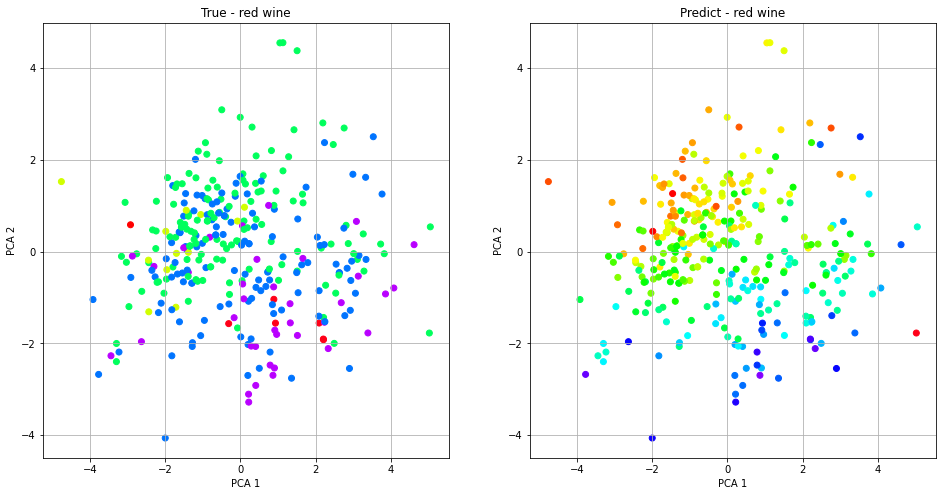

In [ ]:
# 3 - визуализация redWine
pca = PCA(n_components=2)

redWinePCA = pca.fit_transform(X_test_red)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

ax1.scatter(redWinePCA[:, 0], redWinePCA[:, 1], c=y_test_red, cmap='hsv')   
ax1.grid(True)
ax1.set_title("True - red wine")
ax1.set_xlabel("PCA 1")
ax1.set_ylabel("PCA 2")

ax2.scatter(redWinePCA[:, 0], redWinePCA[:, 1], c=y_pred_test_red, cmap='hsv')   
ax2.grid(True)
ax2.set_title("Predict - red wine")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2")

Text(0, 0.5, 'PCA 2')

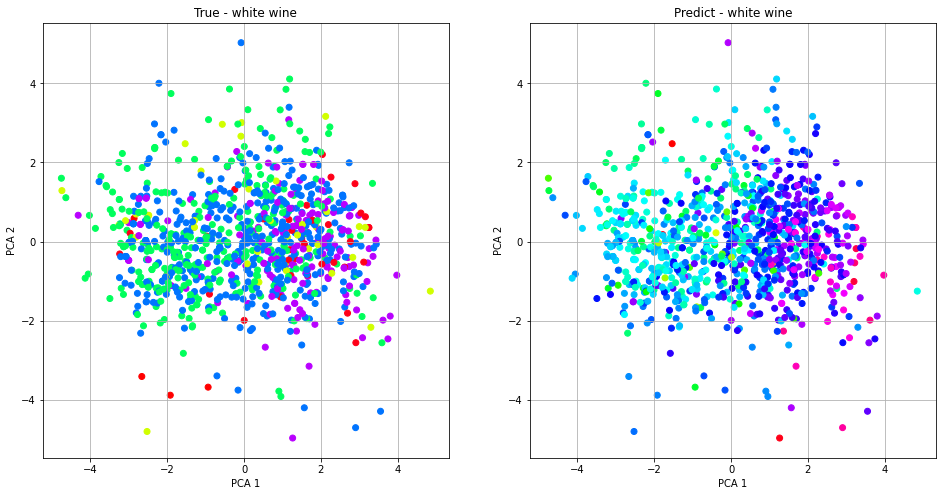

In [ ]:
# 3 - визуализация whiteWine
pca = PCA(n_components=2)

whiteWinePCA = pca.fit_transform(X_test_white)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

ax1.scatter(whiteWinePCA[:, 0], whiteWinePCA[:, 1], c=y_test_white, cmap='hsv')   
ax1.grid(True)
ax1.set_title("True - white wine")
ax1.set_xlabel("PCA 1")
ax1.set_ylabel("PCA 2")

ax2.scatter(whiteWinePCA[:, 0], whiteWinePCA[:, 1], c=y_pred_test_white, cmap='hsv')   
ax2.grid(True)
ax2.set_title("Predict - white wine")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2")

In [ ]:
# 4 - redWine
X = redWine.drop(columns=['quality'])
Y = redWine['quality']
x_training_data, x_test_data, y_training_data, y_test = train_test_split(X, Y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(x_training_data)
X_test = scaler.transform(x_test_data)

model = tree.DecisionTreeClassifier()
model = model.fit(x_training_data, y_training_data)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print(cross_validate(model, X, Y, scoring='accuracy')['test_score'])

[0.49375    0.453125   0.465625   0.48125    0.45768025]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


Text(0, 0.5, 'PCA 2')

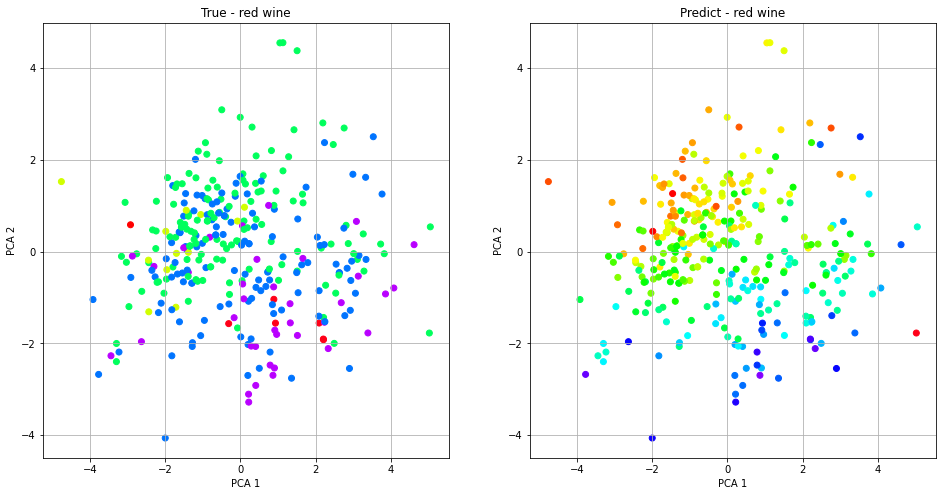

In [ ]:
# 4 - визуализация redWine
pca = PCA(n_components=2)

redWinePCA = pca.fit_transform(X_test_red)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

ax1.scatter(redWinePCA[:, 0], redWinePCA[:, 1], c=y_test_red, cmap='hsv')   
ax1.grid(True)
ax1.set_title("True - red wine")
ax1.set_xlabel("PCA 1")
ax1.set_ylabel("PCA 2")

ax2.scatter(redWinePCA[:, 0], redWinePCA[:, 1], c=y_pred_test_red, cmap='hsv')   
ax2.grid(True)
ax2.set_title("Predict - red wine")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2")

In [ ]:
# 5 - whiteWine
X = whiteWine.drop(columns=['quality'])
Y = whiteWine['quality']
x_training_data, x_test_data, y_training_data, y_test = train_test_split(X, Y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(x_training_data)
X_test = scaler.transform(x_test_data)

model = tree.DecisionTreeClassifier()
model = model.fit(x_training_data, y_training_data)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print(cross_validate(model, X, Y, scoring='accuracy')['test_score'])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


[0.36020408 0.37346939 0.40306122 0.4494382  0.42185904]


Text(0, 0.5, 'PCA 2')

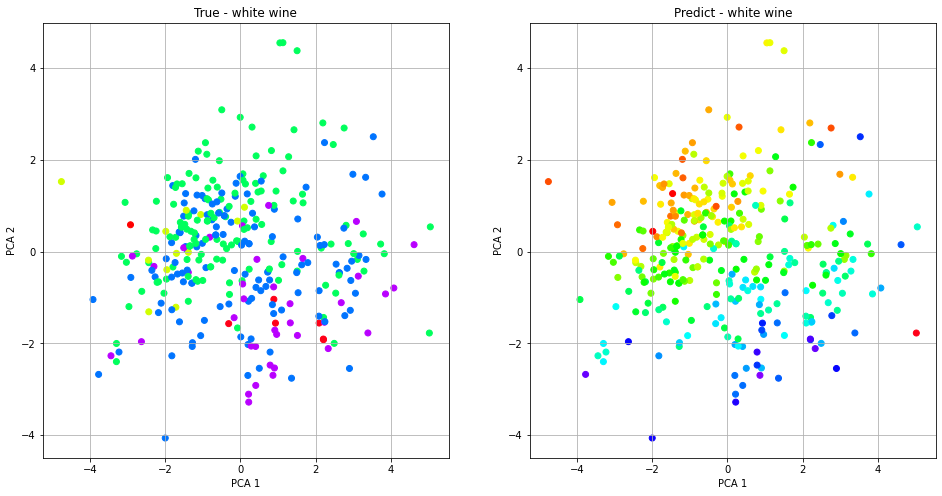

In [ ]:
# 5 - визуализация whiteWine
pca = PCA(n_components=2)

whiteWinePCA = pca.fit_transform(X_test_red)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

ax1.scatter(whiteWinePCA[:, 0], whiteWinePCA[:, 1], c=y_test_red, cmap='hsv')   
ax1.grid(True)
ax1.set_title("True - white wine")
ax1.set_xlabel("PCA 1")
ax1.set_ylabel("PCA 2")

ax2.scatter(whiteWinePCA[:, 0], whiteWinePCA[:, 1], c=y_pred_test_red, cmap='hsv')   
ax2.grid(True)
ax2.set_title("Predict - white wine")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2")

In [ ]:
# 7
X = redWine.drop(columns=['quality'])
Y = redWine['quality']

x_training_data, x_test_data, y_training_data, y_test_red = train_test_split(X, Y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(x_training_data)
X_test_red = scaler.transform(x_test_data)

# train on whiteWine
y_pred_train = model.predict(X_train)
y_pred_test_red = model.predict(X_test_red)
print(cross_validate(model, X, Y, scoring='accuracy')['test_score'])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


[0.496875   0.45625    0.45       0.49375    0.47021944]


Text(0, 0.5, 'PCA 2')

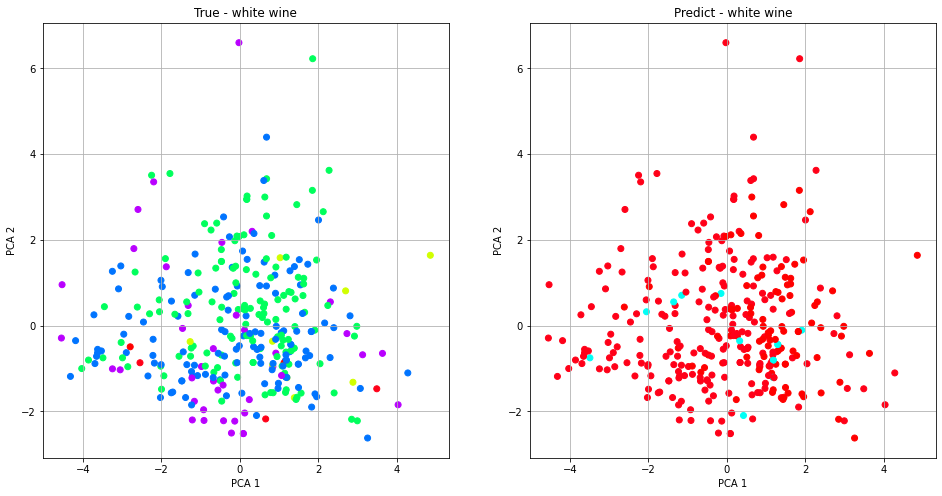

In [ ]:
# 7 - визуализация
pca = PCA(n_components=2)

whiteWinePCA = pca.fit_transform(X_test_red)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

ax1.scatter(whiteWinePCA[:, 0], whiteWinePCA[:, 1], c=y_test_red, cmap='hsv')   
ax1.grid(True)
ax1.set_title("True - white wine")
ax1.set_xlabel("PCA 1")
ax1.set_ylabel("PCA 2")

ax2.scatter(whiteWinePCA[:, 0], whiteWinePCA[:, 1], c=y_pred_test_red, cmap='hsv')   
ax2.grid(True)
ax2.set_title("Predict - white wine")
ax2.set_xlabel("PCA 1")
ax2.set_ylabel("PCA 2")